# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [8]:
import pandas as pd
import seaborn as sns

# Load the Palmer Penguins dataset
penguins = sns.load_dataset('penguins')

# Show the first few rows
print(penguins.head())
print(penguins.isnull().sum())
penguins = penguins.dropna()
penguins_dummies = pd.get_dummies(penguins, drop_first=True)
print(penguins_dummies.head())
print(penguins_dummies.columns)
X = penguins_dummies.drop('bill_depth_mm', axis=1)
y = penguins_dummies['bill_depth_mm']


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3   

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and clean data
penguins = sns.load_dataset("penguins").dropna()

# Dummify categorical variables
penguins = pd.get_dummies(penguins, drop_first=True)

# Define response and predictors
y = penguins["bill_depth_mm"]
X = penguins.drop("bill_depth_mm", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


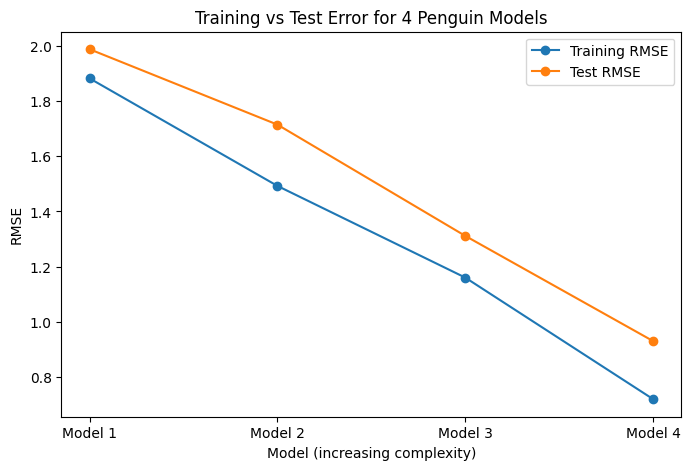

Model 1: train RMSE=1.882, test RMSE=1.988
Model 2: train RMSE=1.493, test RMSE=1.715
Model 3: train RMSE=1.160, test RMSE=1.311
Model 4: train RMSE=0.719, test RMSE=0.930


In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. load + clean
penguins = sns.load_dataset("penguins").dropna()

# 2. dummify WITHOUT drop_first so we don't lose a category
penguins = pd.get_dummies(penguins, drop_first=False)

# 3. define y and X
y = penguins["bill_depth_mm"]
X = penguins.drop("bill_depth_mm", axis=1)

# 4. train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. build your 4 models
# model 1: super simple
model1_vars = ["bill_length_mm"]

# model 2: add a strong biomeasure
model2_vars = ["bill_length_mm", "flipper_length_mm"]

# model 3: body mass + ANY sex dummies that exist
sex_cols = [col for col in X.columns if col.startswith("sex_")]
model3_vars = ["body_mass_g"] + sex_cols

# model 4: everything
model4_vars = X.columns.tolist()

models = [model1_vars, model2_vars, model3_vars, model4_vars]

train_errors = []
test_errors = []

for vars_ in models:
    model = LinearRegression()
    model.fit(X_train[vars_], y_train)

    # predictions
    y_train_pred = model.predict(X_train[vars_])
    y_test_pred = model.predict(X_test[vars_])

    # MSE -> RMSE (no 'squared=')
    train_rmse = mean_squared_error(y_train, y_train_pred) ** 0.5
    test_rmse = mean_squared_error(y_test, y_test_pred) ** 0.5

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# 6. plot like the Model Validation figure
plt.figure(figsize=(8,5))
x_vals = range(1, 5)
plt.plot(x_vals, train_errors, marker="o", label="Training RMSE")
plt.plot(x_vals, test_errors, marker="o", label="Test RMSE")
plt.xticks(x_vals, [f"Model {i}" for i in x_vals])
plt.xlabel("Model (increasing complexity)")
plt.ylabel("RMSE")
plt.title("Training vs Test Error for 4 Penguin Models")
plt.legend()
plt.show()

# 7. print errors so we can pick the winner
for i, (tr, te) in enumerate(zip(train_errors, test_errors), start=1):
    print(f"Model {i}: train RMSE={tr:.3f}, test RMSE={te:.3f}")
